############################## 2019/07/31 #######################################

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [27]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()
%matplotlib inline 

In [7]:
#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [8]:
df_train = pd.read_csv("Bike Sharing Demand train.csv")
df_test = pd.read_csv("Bike Sharing Demand test.csv")

In [9]:
df_train.head() #無缺失值

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


串接資料以進行特徵工程

In [12]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [13]:
df_test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [14]:
those_feature_not_in_test = df_train[['casual','registered']]
those_feature_not_in_test.head(3)

,casual,registered
0,3,13
1,8,32
2,5,27


In [15]:
result_count = df_train[['count']]
result_count.head(3)

,count
0,16
1,40
2,32


In [16]:
test,train = df_test,df_train

In [17]:
test['type'],train['type'] = 'test','train'

In [18]:
test['casual'],test['registered'],test['count'] = 0,0,0

In [19]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'type', 'casual', 'registered',
       'count'],
      dtype='object')

In [20]:
all_ = pd.concat((df_train,test))
all_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  count       17379 non-null  int64  
 12  type        17379 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.9+ MB


### 觀察資料分布

In [21]:
all_['season'].value_counts()

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

In [22]:
all_.holiday.value_counts() # whether the day is considered a holiday

holiday
0    16879
1      500
Name: count, dtype: int64

In [24]:
jud = ['season', 'holiday', 'workingday', 'weather',]
for col in jud:
    print(all_[col].value_counts())

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64
holiday
0    16879
1      500
Name: count, dtype: int64
workingday
1    11865
0     5514
Name: count, dtype: int64
weather
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


In [25]:
all_.weather.value_counts()

weather
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

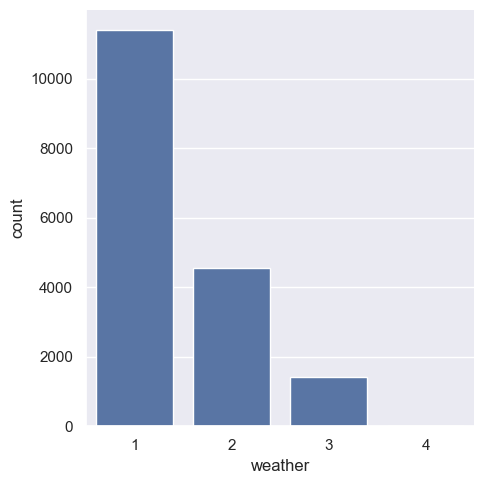

In [37]:
sns.catplot(data=all_,x='weather',kind='count',height=5,aspect=1)
#sns.factorplot(data=all_,x='weather',kind='count',size=5,aspect=1) #factorplot()目前被集成在catplot()中
#plt.show()


(array([ 117.,  953., 2444., 2913., 2433., 2684., 3150., 1976.,  625.,
          84.]),
 array([ 0.82 ,  4.838,  8.856, 12.874, 16.892, 20.91 , 24.928, 28.946,
        32.964, 36.982, 41.   ]),
 <BarContainer object of 10 artists>)

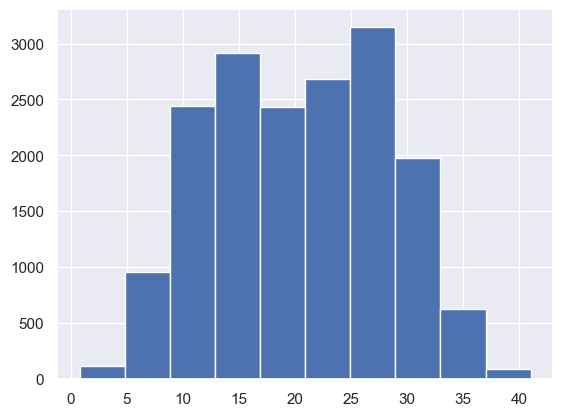

In [38]:
plt.hist(all_['temp']) #常態分配，利於分析資料

(array([  78.,  786., 2342., 2631., 3047., 3216., 3942., 1044.,  279.,
          14.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

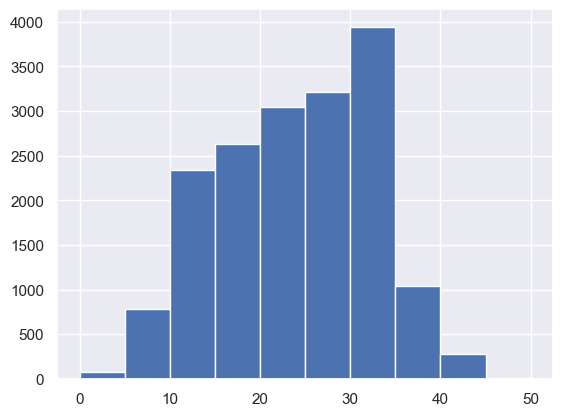

In [39]:
plt.hist(all_['atemp'])

(array([  23.,   55.,  583., 1594., 2641., 2817., 2777., 2814., 2900.,
        1175.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

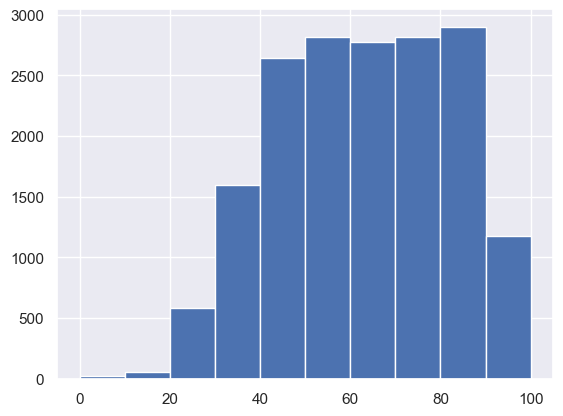

In [40]:
plt.hist(all_['humidity'])

(array([2.180e+03, 6.475e+03, 4.465e+03, 2.458e+03, 1.137e+03, 4.340e+02,
        1.670e+02, 4.800e+01, 9.000e+00, 6.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

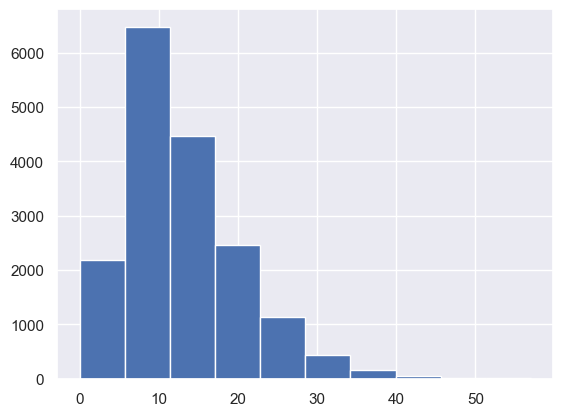

In [41]:
plt.hist(all_['windspeed'])

所有特徵皆放入RF模型，得出準確度相當的低

In [42]:
x = df_train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]

In [43]:
y = result_count

In [44]:
RF = RandomForestClassifier(random_state=2,n_estimators=100,min_samples_split=20,oob_score=True)
RF.fit(x,y)
RF.oob_score_

0.009094249494763918

**各特徵相關係數**

In [53]:
all_corr = df_train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']].corr() #排除表頭
corr = abs(all_corr.loc[:,'count']).sort_values(ascending=False)
corr = corr.drop('count')
corr

registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
humidity      0.317371
season        0.163439
weather       0.128655
windspeed     0.101369
workingday    0.011594
holiday       0.005393
Name: count, dtype: float64

去除掉相關係數較低的特徵

In [54]:
x = train[[ 'temp','atemp', 'humidity']]

In [55]:
RF = RandomForestClassifier(random_state=2,n_estimators=100,min_samples_split=20,oob_score=True)
RF.fit(x,y)
RF.oob_score_

0.010472166084879662

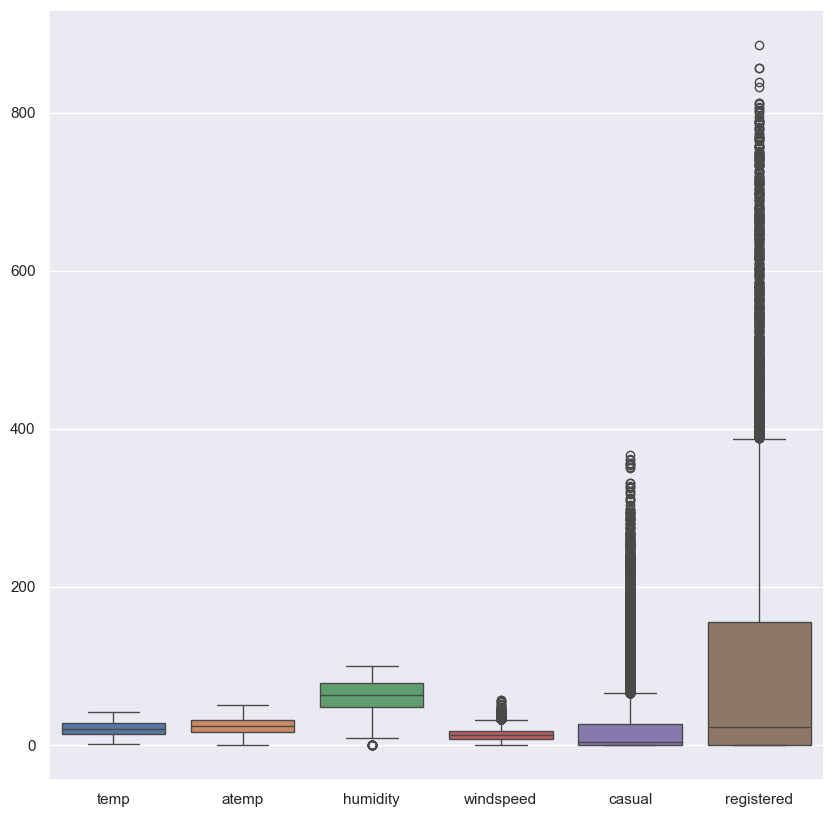

In [56]:
sns.boxplot(data=all_[['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered']])
fig=plt.gcf()
fig.set_size_inches(10,10)

### 特徵工程

**先對時間進行分段**

In [57]:
all_['date'] = all_.datetime.apply(lambda x : x.split()[0])
all_['date'].head()

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: date, dtype: object

In [58]:
all_['month'] = all_.datetime.apply(lambda x : int(x.split()[0].split('-')[1]))
all_['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [59]:
all_['day'] = all_.datetime.apply(lambda x : int(x.split()[0].split('-')[2]))
all_['day'].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int64

In [60]:
all_['year'] = [t.year for t in pd.DatetimeIndex(all_.datetime)]
all_['year'] = all_['year'].map({2011:0, 2012:1})

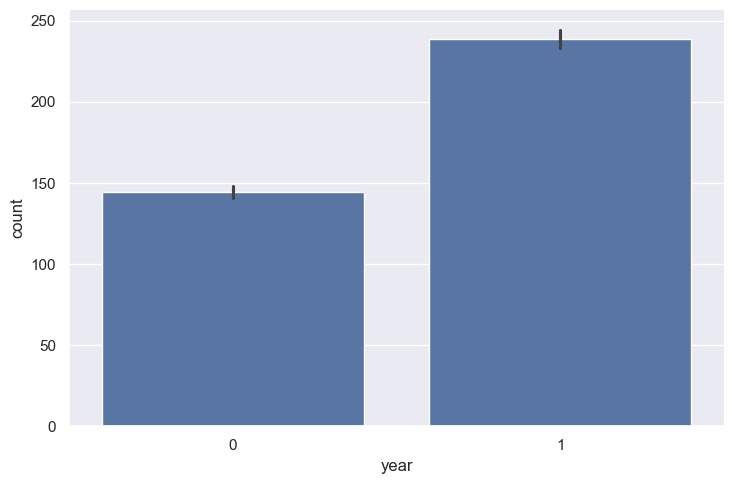

In [63]:
sns.catplot(x='year',y='count',data=all_.loc[all_.type=='train',:],kind='bar',height=5,aspect=1.5)

2012年租用量高於2011年

<Axes: xlabel='month'>

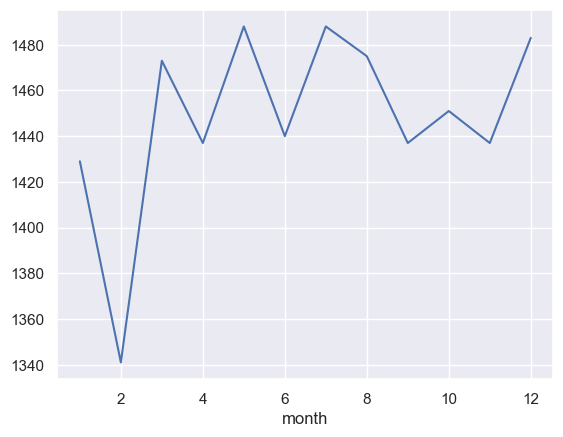

In [64]:
all_.month.value_counts().sort_index().plot(kind='line')

In [65]:
all_['hour'] = all_.datetime.apply(lambda x : int(x.split()[1].split(":")[0]))

**每小時的租用量**

<Axes: xlabel='hour'>

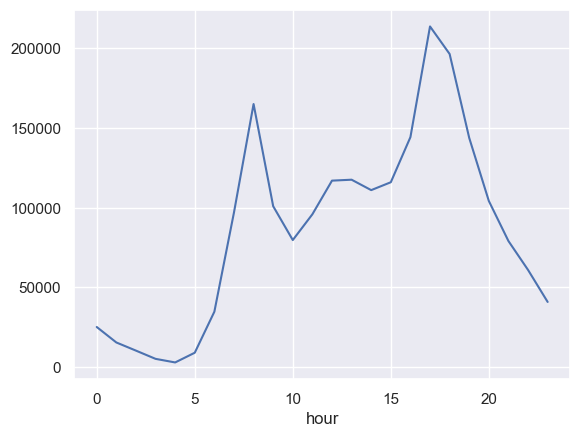

In [66]:
all_.groupby('hour').sum()['count'].sort_index().plot(kind='line')

根據每小時用量，可以將一天劃分為5個時段

In [67]:
def hour_split(h):
    if h >=0 and h <=6:
        return 0
    elif h >=7 and h <=10:
        return 1
    elif h >= 11 and h <=15:
        return 2
    elif h >= 16 and h <=20:
        return 3
    else:
        return 4

In [68]:
all_['hour_section'] = all_.hour.apply(hour_split)

**是否為假日**

<Axes: xlabel='holiday'>

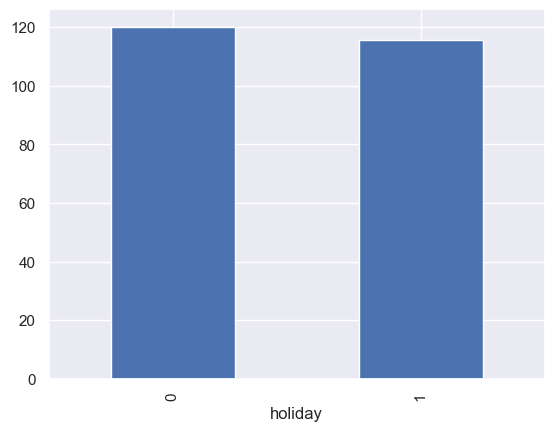

In [69]:
all_.groupby('holiday')['count'].mean().plot(kind='bar')

<Axes: xlabel='hour', ylabel='count'>

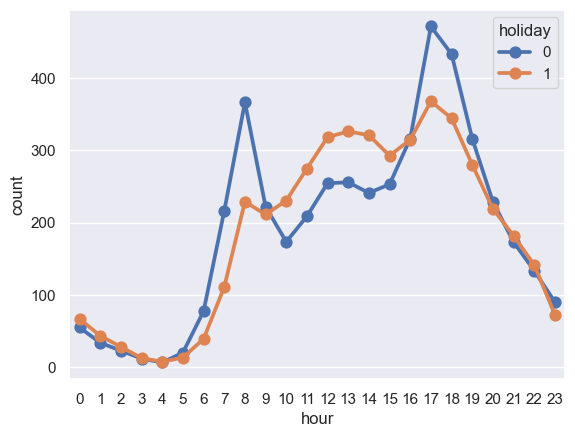

In [70]:
holiday_or_not = pd.DataFrame(all_.loc[all_.type=='train'].groupby(["hour","holiday"],sort=True)['count'].mean()).reset_index()
sns.pointplot(x=holiday_or_not['hour'],y=holiday_or_not['count'],hue=holiday_or_not["holiday"],data=holiday_or_not,join=True)

是否為假日差異不明顯，影響幅度不大

**星期制**

In [71]:
import datetime

In [72]:
all_['week'] = all_.date.apply(lambda x : datetime.datetime.strptime(x,"%Y-%m-%d").weekday())
# 之所以出現 datetime.datetime.strptime 的原因是，datetime 套件裡面的 datetime.strptime 函數

<Axes: xlabel='hour', ylabel='count'>

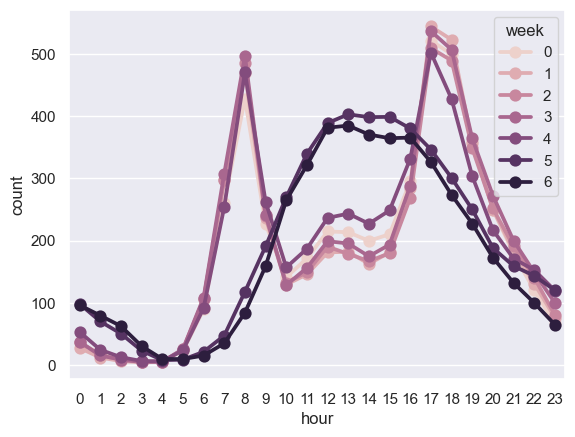

In [73]:
week = pd.DataFrame(all_.loc[all_.type=='train'].groupby(["hour","week"],sort=True)['count'].mean()).reset_index()
sns.pointplot(x=week['hour'],y=week['count'],hue=week["week"],data=week,join=True)

明顯發現周末(week=6、5)與平日(week=0~4)之分佈差異

周末呈現常態分布，平日則有兩個高峰，應該是上下班時間

而前面以'是否為假日'分類之所以差異不明顯，推測原因是許多人作息或放假與否和國定假日並無直接關係

**是否為工作天**

<Axes: xlabel='hour', ylabel='count'>

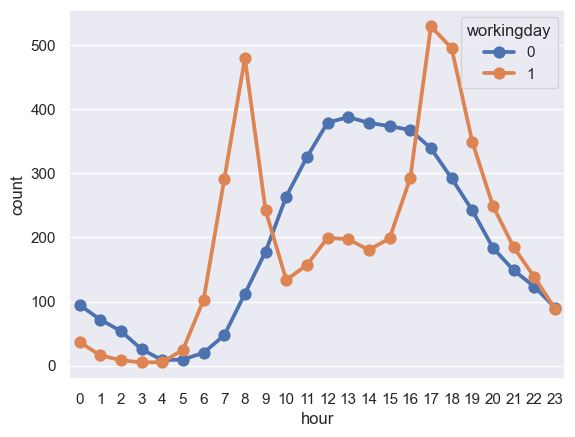

In [74]:
holiday_or_not = pd.DataFrame(all_.loc[all_.type=='train'].groupby(["hour","workingday"],sort=True)['count'].mean()).reset_index()
sns.pointplot(x=holiday_or_not['hour'],y=holiday_or_not['count'],hue=holiday_or_not["workingday"],data=holiday_or_not,join=True)

"是否工作天"明顯和"星期制"趨勢一樣。可以和小時進行拼接，得到新的特徵

**每個月份 & 季節的腳踏車租用量**

<Axes: xlabel='month'>

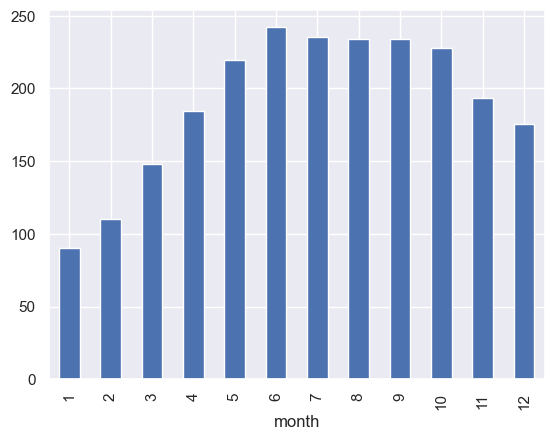

In [75]:
all_.loc[all_.type=='train'].groupby(["month"])['count'].mean().plot(kind='bar')

<Axes: xlabel='season'>

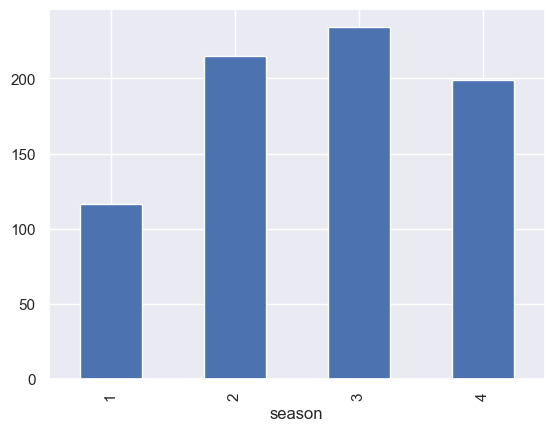

In [76]:
all_.loc[all_.type=='train'].groupby(["season"])['count'].mean().plot(kind='bar')

**天氣**

<Axes: xlabel='weather'>

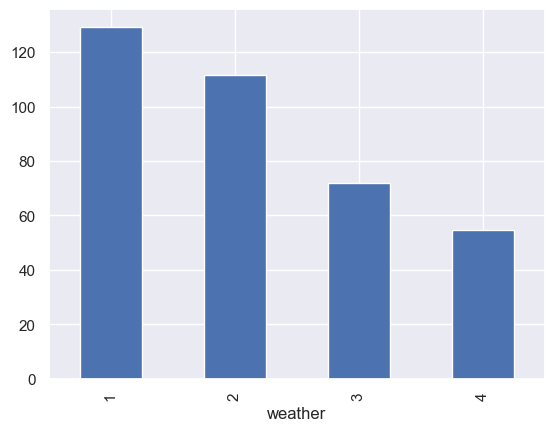

In [78]:
all_.groupby('weather')['count'].mean().plot(kind='bar')

此為一個很好的特徵

**溫度**

In [79]:
all_[['temp','atemp','count']].corr()

,temp,atemp,count
temp,1.000000,0.987672,0.245778
atemp,0.987672,1.000000,0.244577
count,0.245778,0.244577,1.000000


正相關但不高

In [80]:
all_['temp_int'] = all_.temp.apply(lambda x :int(x))

<Axes: xlabel='temp_int'>

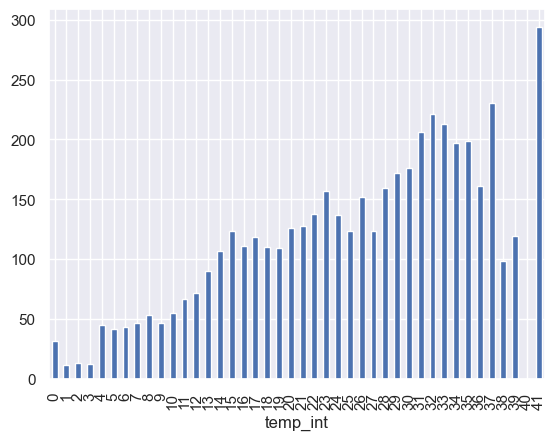

In [82]:
all_.groupby('temp_int')['count'].mean().plot(kind='bar')

41度時租借量特別大，感覺不太符合常理。需另外特別處理

**濕度**

<Axes: xlabel='humidity_int'>

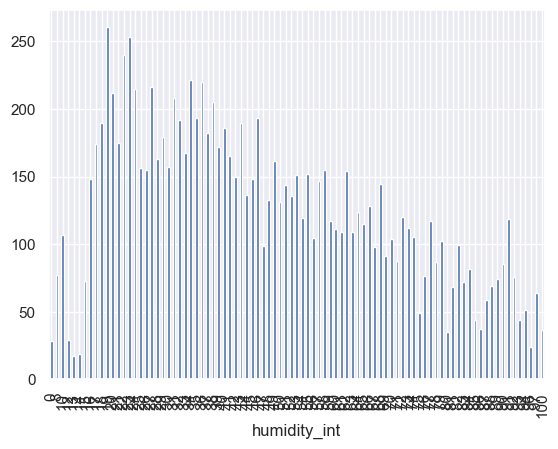

In [84]:
all_['humidity_int'] = all_.humidity.apply(lambda x :int(x))
all_.groupby('humidity_int')['count'].mean().plot(kind='bar')

呈現負相關

**風速**

<Axes: xlabel='windspeed'>

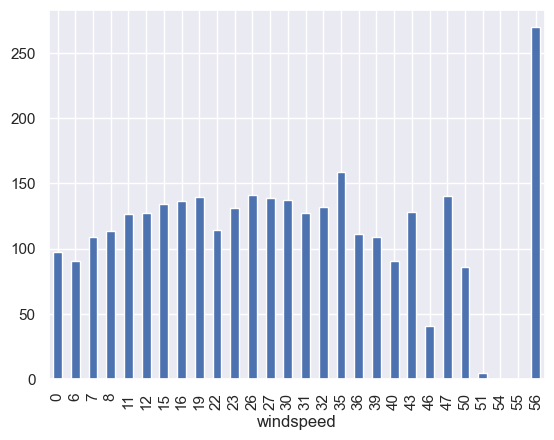

In [88]:
# mean
pd.DataFrame({'windspeed':all_.windspeed.apply(lambda x:int(x)),'count':all_['count']}).groupby('windspeed')['count'].mean().plot(kind='bar')

<Axes: xlabel='windspeed'>

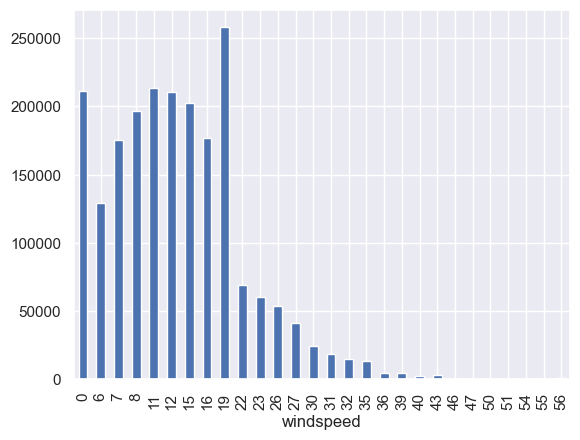

In [89]:
# sum
pd.DataFrame({'windspeed':all_.windspeed.apply(lambda x:int(x)),'count':all_['count']}).groupby('windspeed')['count'].sum().plot(kind='bar')

風速0時似乎不合常理，可能是 fill null 時導致。整體來看風速與租用量關係不大

In [90]:
Wind0 = all_[all_["windspeed"]==0]
WindNot0 = all_[all_["windspeed"]!=0]

In [91]:
all_.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'type', 'date', 'month', 'day', 'year', 'hour', 'hour_section', 'week',
       'temp_int', 'humidity_int'],
      dtype='object')

In [92]:
rf_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rf_wind.fit(WindNot0[windColumns], WindNot0["windspeed"])

RandomForestRegressor()

In [96]:
wind0Values = rf_wind.predict(X= Wind0[windColumns])
Wind0["windspeed"] = wind0Values
all_ = pd.concat([WindNot0, Wind0])
#all_ = WindNot0.append(Wind0)
all_.reset_index(inplace=True)
all_.drop('index',inplace=True,axis=1)

<Axes: xlabel='windspeed'>

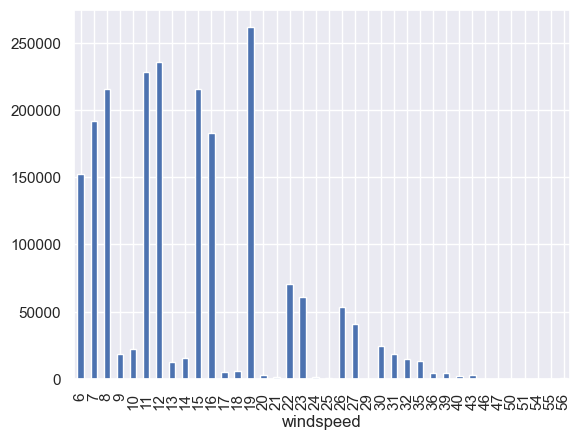

In [97]:
pd.DataFrame({'windspeed':all_.windspeed.apply(lambda x:int(x)),'count':all_['count']}).groupby('windspeed')['count'].sum().plot(kind='bar')

**再次求特徵相關係數**

In [98]:
CorMatrix = all_.loc[all_.type=='train',["hour_section","temp","atemp","humidity","windspeed",'year','workingday',"count"]].corr()

In [99]:
mask = np.array(CorMatrix)
mask[np.tril_indices_from(mask)]=False

<Axes: >

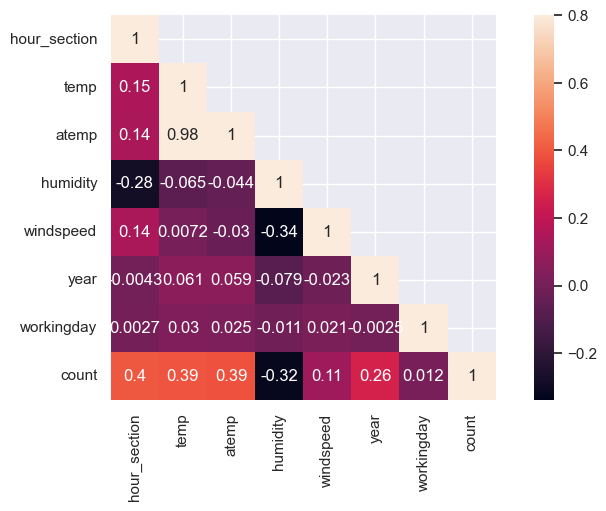

In [100]:
#設置環境變數
sns.set()
fig,ax = plt.subplots()

#畫圖
fig.set_size_inches(10,5)
sns.heatmap(CorMatrix,mask=mask,vmax=0.8,square=True,annot=True)

可以觀察到 : 

1.濕度與租用量呈負相關

2.溫度和租用量為正相關，且和風速是幾乎獨立的

**小結**

1.根據日期星期、小時的使用量，構建新的特征

2.根據工作日和小時，構建新的特征 

3.溫度正相關，但是相關的不夠

4.濕度負相關

5.風速對模型建立沒有幫助

6.特徵資料需要進行log1p變換。盡量使得目標預測值保持一常態分布

7.風速為0可能是缺失值造成的

8.溫度40度的缺失，41度的異常值

### 異常值處理

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot on Count Across Working Day')]

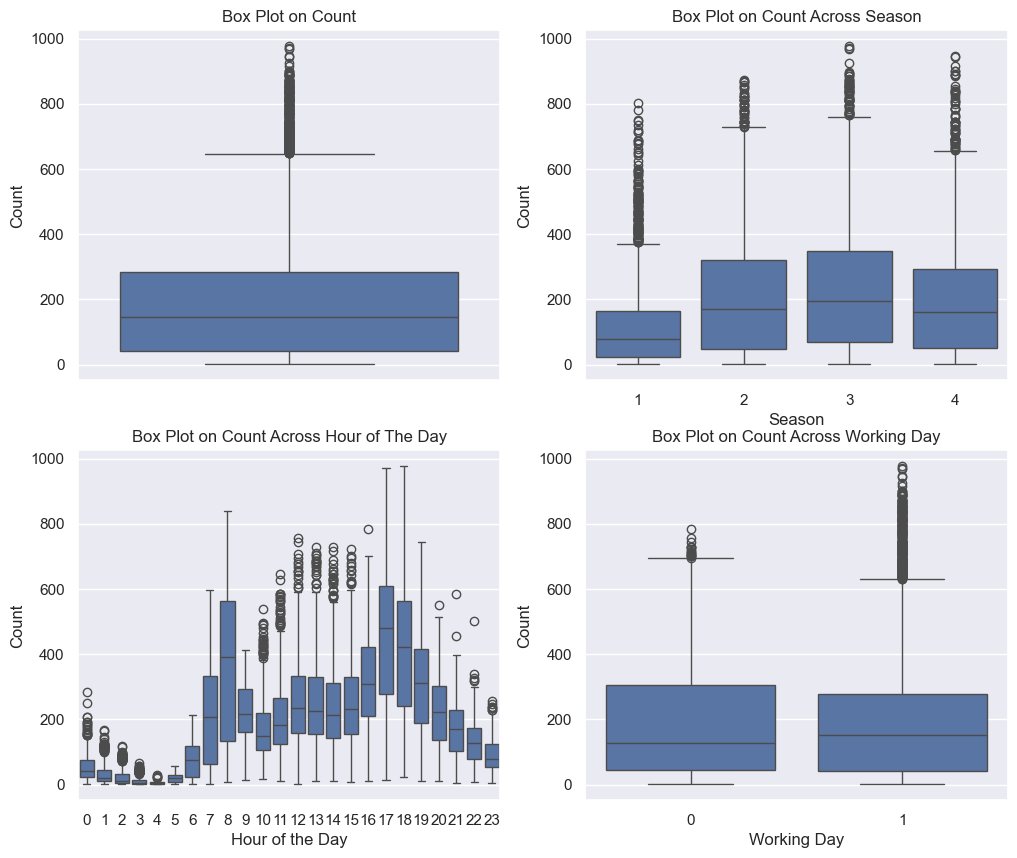

In [101]:
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=all_.loc[all_.type=='train'],y='count',ax=axes[0][0])
axes[0][0].set(ylabel='Count',title='Box Plot on Count')

sns.boxplot(data=all_.loc[all_.type=='train'],y='count',x='season',ax=axes[0][1])
axes[0][1].set(xlabel='Season',ylabel='Count',title='Box Plot on Count Across Season')

sns.boxplot(data=all_.loc[all_.type=='train'],y='count',x='hour',ax=axes[1][0])
axes[1][0].set(xlabel='Hour of the Day',ylabel='Count',title="Box Plot on Count Across Hour of The Day")

sns.boxplot(data=all_.loc[all_.type=='train'],y='count',x='workingday',ax=axes[1][1])
axes[1][1].set(xlabel="Working Day",ylabel='Count',title="Box Plot on Count Across Working Day")

# axes[0][0] 是圖片放置位置

黑色粗棒體即是極端值(離群點)

**極端值個數**(這裡只針對count)

根據前面畫圖結果，並沒有低於平均太多的極端值，因此這裡設定大於三倍平均數的值為極端值

In [102]:
absurdity = np.abs(all_.loc[all_.type=='train',["count"]]-all_.loc[all_.type=='train',["count"]].mean())>(3*all_.loc[all_.type=='train',["count"]].mean())
absurdity.head(3)

,count
0,False
1,False
2,False


In [103]:
len(absurdity)

10886

此處以迴圈驗證該行代碼(**all_.loc[all_.type=='train'][absurdity["count"]]**)可以代表極端值個數

In [108]:
T = absurdity['count'].sum()
print(T)
"""""
T = 0
for row in range(len(absurdity)):
    if absurdity.loc[row,'count']==True:
        T+=1
print(T)
"""""

118


'""\nT = 0\nfor row in range(len(absurdity)):\n    if absurdity.loc[row,\'count\']==True:\n        T+=1\nprint(T)\n'

In [109]:
len(all_.loc[all_.type=='train'][absurdity["count"]])

118

**刪除極端值**

In [110]:
ultra_row = list(all_.loc[all_.type=='train'][absurdity["count"]].index)

In [111]:
all_ = all_.drop(labels=None,axis=0, index=ultra_row, columns=None, inplace=False)

In [112]:
len(all_.loc[all_.type=='train'])

10768

### 特徵常態化

通常若數據呈現常態分配的話，以其為基礎建立的模型效果會比較好

<Axes: ylabel='Density'>

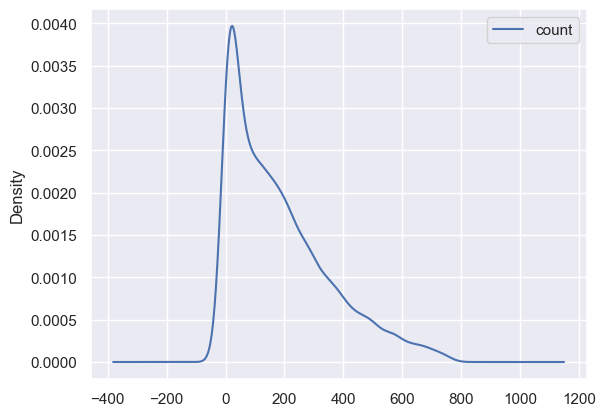

In [113]:
all_.loc[all_.type=='train',['count']].plot(kind='kde')

In [114]:
import math

<Axes: ylabel='Density'>

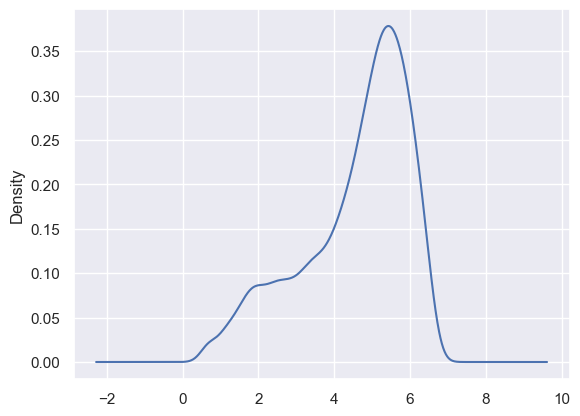

In [115]:
all_.loc[all_.type=='train',['count']]['count'].apply(lambda x :math.log(1+x)).plot(kind='kde')

### 數據歸一化

**常數經歸一化後**，對於任何非負函數的任意區間所含有之常數使得該函數對於一特定區間之積分恰好等於1。在**量子力學**裡，表達粒子的量子態的波函數必須滿足歸一條件。也就是說，在空間內找到粒子的機率必須等於 1 

在**數據分析**這裡，指的是把數據轉換成0～1範圍之內處理，更加便捷快速

**歸一化後有兩個好處**

1.提升模型的收斂速度

2.提升模型的精度

這在涉及到一些距離計算的算法時**效果顯著**。如SVM、回歸

**類別型**

In [116]:
all_=pd.get_dummies(all_,columns=['season']) 
all_=pd.get_dummies(all_,columns=['weather']) 
#這裡使用pd.get_dummies()，功能是將特定column進行one-hot編碼

**數值型**

In [117]:
from sklearn import preprocessing

In [118]:
scaler = preprocessing.StandardScaler()
temp_scale_param = scaler.fit(all_[['temp']])
all_['temp_scaled'] = scaler.fit_transform(all_[['temp']], temp_scale_param)

In [119]:
scaler = preprocessing.StandardScaler()
atemp_scale_param = scaler.fit(all_[['atemp']])
all_['atemp_scaled'] = scaler.fit_transform(all_[['atemp']], atemp_scale_param)

In [120]:
scaler = preprocessing.StandardScaler()
windspeed_scale_param = scaler.fit(all_[['windspeed']])
all_['windspeed_scaled'] = scaler.fit_transform(all_[['windspeed']], windspeed_scale_param)

In [121]:
scaler = preprocessing.StandardScaler()
humidity_scale_param = scaler.fit(all_[['humidity']])
all_['humidity_scaled'] = scaler.fit_transform(all_[['humidity']], humidity_scale_param)

### 建立模型

In [122]:
x = all_.loc[all_.type=='train',['datetime', 'holiday','year','workingday', 'date',
                                 'month', 'day', 'hour', 'hour_section', 'week',
                                 'season_1', 'season_2', 'season_3', 'season_4',
                                 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'temp_scaled',
                                 'atemp_scaled', 'windspeed_scaled', 'humidity_scaled']]
x.shape

(10768, 22)

In [123]:
y = all_.loc[all_.type=='train',['count']]
y.shape

(10768, 1)

In [124]:
y_array = np.array(y)
y_array.ravel()

array([  1,  36,  56, ..., 662, 132,  41], dtype=int64)

In [125]:
x1 = ['workingday','holiday','month','day','hour',
      'season_1', 'season_2','season_3', 'season_4','weather_1', 'weather_2', 'weather_3', 'weather_4',
      'temp_scaled','atemp_scaled', 'windspeed_scaled', 'humidity_scaled']

**RMSLE Scorer**

In [126]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

**先決定要使用哪個模型**

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x[x1],y,test_size=0.2,random_state=30)

In [128]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']

In [129]:
rmsle,efficient = [],{}

In [130]:
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
rmsle_frame=pd.DataFrame({'Model name':model_names,'RMSLE':rmsle})
rmsle_frame

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

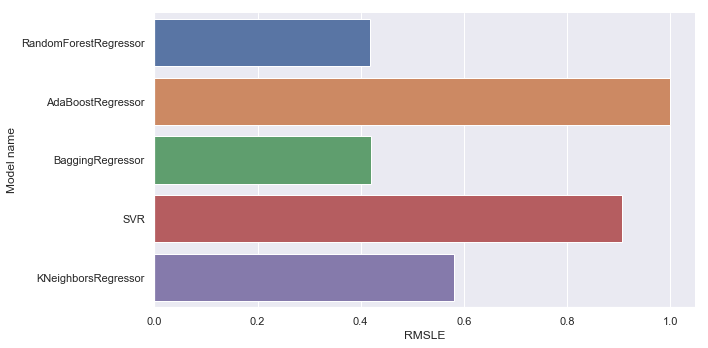

In [212]:
sns.factorplot(y="Model name",x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

**Random Forest Regressor**

In [139]:
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[1],'max_features':["auto",'sqrt','log2'],'oob_score':[True]}

In [ ]:
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')

In [140]:
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.40787989823765436


In [141]:
clf_rf.fit(x[x1],y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'n_jobs': [1], 'max_features': ['auto', 'sqrt', 'log2'], 'oob_score': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_log_error', verbose=0)

In [145]:
x_pre1 = all_.loc[all_['type']=='test',x1]

In [146]:
pre = clf_rf.predict(x_pre1)

**RandomForesr**

In [88]:
rf_beta = RandomForestClassifier(random_state=2,n_estimators=100,min_samples_split=20,oob_score=True,n_jobs=1)

In [93]:
rf_beta.fit(x[x3],y_array)
rf_beta.oob_score_

0.02210252600297177

**調參**

**RF的最佳解**

In [99]:
x_pre1 = all_.loc[all_['type']=='test',x3]

In [100]:
x_pre = rf.predict(x_pre1)

In [148]:
sub1 = all_.loc[all_['type']=='test',['datetime']]

In [149]:
sub1['count'] = pre
sub1.head()

,datetime,count
0,2011-01-20 00:00:00,13.968
1,2011-01-20 01:00:00,6.306
2,2011-01-20 02:00:00,7.084
3,2011-01-20 03:00:00,3.862
4,2011-01-20 04:00:00,2.874


In [150]:
sub1.to_csv("Bike demend sub by GridSearchCV.csv",index=False)

In [79]:
all_.columns

Index(['atemp', 'casual', 'count', 'datetime', 'holiday', 'humidity',
       'registered', 'temp', 'type', 'windspeed', 'workingday', 'date',
       'month', 'day', 'hour', 'hour_section', 'week', 'temp_int',
       'humidity_int', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'temp_scaled',
       'atemp_scaled', 'windspeed_scaled', 'humidity_scaled'],
      dtype='object')